# Julia 
### Exemplary Problem: Numerical solution of logistic differential equation 
$\frac{\partial U(t)}{\partial t} = U(t)(1-U(t))$ 
 
Strategy: 
Transform into discrete sequence and calculate the single steps for sufficient small time steps $\Delta t$.

$U(t+\Delta t) =U(t)+ U(t)(1-U(t))\Delta t $

Preparation: Install neccesary packages (only for the first time running this notebook)

In [ ]:
#using Pkg
#Pkg.add("BenchmarkTools")
#Pkg.add("Plots")

First step: Import neccesary packages

In [1]:
using Plots
using BenchmarkTools

Second step: Define function for discretisation with number of steps N as input argument

In [2]:
function julia_logistic(N)
    # Parameters
    T = 25.0
    u0 = 1e-5
    # Right hand side function
    f(U)= U*(1-U)
    # Discretization
    t = collect(LinRange(0.0,T,N))
    dt = T/N
    # Time stepping
    u = zeros(N)
    u[1] = u0
    for k = 1:(N-1)
        u[k+1] = u[k] + dt*f(u[k])
    end
    return(t,u)
   
end

julia_logistic (generic function with 1 method)

Third step: Visualize the problem to see if everthing works as planned  

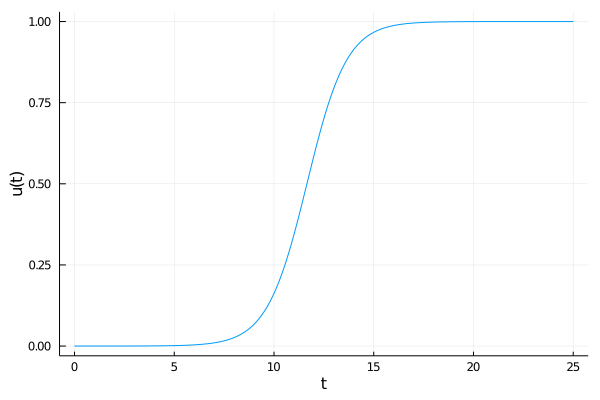

In [4]:
T,U = julia_logistic(1000)
plot(
    T,
    U, 
    xlabel = "t",
    ylabel ="u(t)",
    label ="",
    )

Fourth step: Benchmark the function 

In [6]:
@benchmark julia_logistic(1000)

BenchmarkTools.Trial: 10000 samples with 3 evaluations.
 Range (min … max):   7.900 μs …  3.604 ms  ┊ GC (min … max):  0.00% … 99.71%
 Time  (median):      9.833 μs              ┊ GC (median):     0.00%
 Time  (mean ± σ):   13.281 μs ± 55.152 μs  ┊ GC (mean ± σ):  10.19% ±  2.94%

  █▅▄▄▄▅▆▅▃▃▂▂▂▁▁▁▁                           ▁               ▁
  ███████████████████▇▇▇▇▆▆▆▇▅▆▆▅▅▄▄▄▅▄▅▄▄▅▇▇▇██▇▇▅▆▅▅▅▅▅▅▅▄▅ █
  7.9 μs       Histogram: log(frequency) by time      42.9 μs <

 Memory estimate: 15.91 KiB, allocs estimate: 3.

Fifth step: Realize that Julia is actually fast !